In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
df=pd.read_csv("2019-Oct.csv",nrows=100000)
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [3]:
import os
os.listdir()

['.anaconda',
 '.conda',
 '.condarc',
 '.continuum',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.vscode',
 '2019-Oct.csv',
 'anaconda3',
 'AppData',
 'Application Data',
 'Cookies',
 'Downloads',
 'Favorites',
 'Future_Interns_DS',
 'Local Settings',
 'Music',
 'My Documents',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{97158fa3-4f25-11f0-b00d-f83dc6306e15}.TM.blf',
 'NTUSER.DAT{97158fa3-4f25-11f0-b00d-f83dc6306e15}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{97158fa3-4f25-11f0-b00d-f83dc6306e15}.TMContainer00000000000000000002.regtrans-ms',
 'ntuser.ini',
 'OneDrive',
 'PrintHood',
 'Recent',
 'SendTo',
 'Start Menu',
 'Task3_Marketing_Funnel_Analysis.ipynb',
 'Templates',
 'Untitled.ipynb',
 'Videos']

In [5]:
df.shape

(100000, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     100000 non-null  object 
 1   event_type     100000 non-null  object 
 2   product_id     100000 non-null  int64  
 3   category_id    100000 non-null  int64  
 4   category_code  67413 non-null   object 
 5   brand          85607 non-null   object 
 6   price          100000 non-null  float64
 7   user_id        100000 non-null  int64  
 8   user_session   100000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 6.9+ MB


In [7]:
df['event_type'].value_counts()

event_type
view        97130
purchase     1655
cart         1215
Name: count, dtype: int64

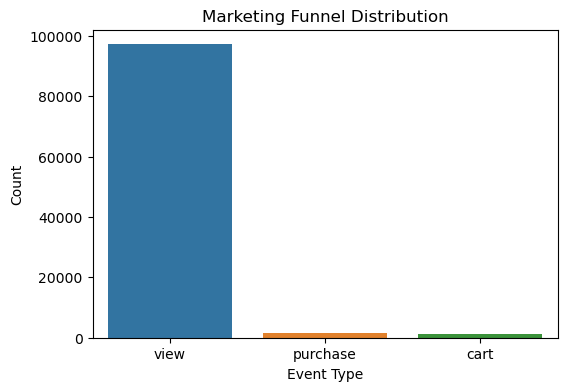

In [8]:
funnel=df['event_type'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=funnel.index,y=funnel.values)
plt.title("Marketing Funnel Distribution")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.show()

In [11]:
views=funnel.get('view',0)
carts=funnel.get('cart',0)
purchases=funnel.get('purchase',0)
view_to_cart=(carts/views)*100 if views else 0
cart_to_purchase=(purchases/carts)*100 if carts else 0
print("View->Cart Conversion",round(view_to_cart,2),"%")
print("Cart->Purchase Conversion:",
     round(cart_to_purchase,2),"%")

View->Cart Conversion 1.25 %
Cart->Purchase Conversion: 136.21 %


## 📊 Key Insights

- The majority of user activity is in the *view* stage (~97%), indicating strong top-of-funnel traffic.
- Only a small portion of users proceed to *cart (~1.2%)*, showing significant drop-off after product views.
- The *purchase count is relatively low*, suggesting conversion bottlenecks in the funnel.
- The biggest leakage occurs between *view → cart*, which is the primary optimization opportunity.
- Overall, the marketing funnel shows *high awareness but low conversion efficiency*.

 ## 💡 Recommendations

- Improve product page experience to encourage add-to-cart actions.
- Use personalized recommendations and retargeting for users who only view products.
- Simplify the add-to-cart and checkout process.
- Offer limited-time discounts or free shipping to push cart conversions.
- Focus marketing efforts on high-intent users to improve purchase rates.

## 📌 Final Conclusion

The marketing funnel analysis reveals strong user interest at the viewing stage but significant drop-offs before purchase. Optimizing the transition from product view to cart and improving checkout incentives can substantially enhance overall conversion performance.